# Integración y diferenciación numerica
El calculo diferencial trata dos temas relacionados, las derivadas y las integrales. En nuestro caso estudiamos funciones analiticas que se pueden derivar, y ingrales propias  e impropias. Es importante tener en cuanta que el callculo o analisis real utiliza el procesos de limite. El proceso de limite es un calculo infinito y abstracto. Por otro lado las computadoras son maquinas finitas y poseen finitos recursos como memoria y tiempo de ejecucion. Por lo tanto tenemos que cuantificar el proceso de limite. En este capitulo desarrollaermos metodos numericos para computar derivadas e integrales de forma numerica.

In [1]:
# Settings
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
from ipywidgets import interact

#### Derivacion finita
el concepto de derivacion proviene de la aproximacion de el calculo de la pendiente, una pendiente aproximada con dos puntos se puede calcular como la razon entre el cambio de la funcion como:
$$ \frac{\Delta f(x)}{\Delta x} = \frac{f(x+\Delta x) - f(x)}{\Delta x}$$

si tenemos una funcion de prueba como $f(x) = x^2$ podemos calcular su derivada como $f'(x) = 2x$:

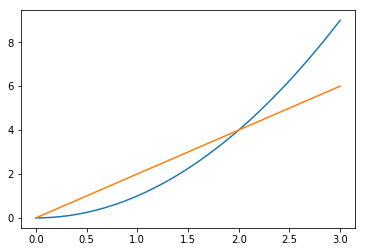

In [2]:
f = lambda x: x**2
df = lambda x: 2*x

line_at = lambda x:b + m*x

v_f = np.vectorize(f)
v_df = np.vectorize(df)
x = np.linspace(0,3)

plt.plot(x,v_f(x),x,v_df(x))


In [3]:
def diff_finita(f,x,h):
    return (f(x+h)-f(x))/(h)

@interact(h=(1e-6,1.0,.1))
def grafica(h):
    display(diff_finita(f,1,h))

interactive(children=(FloatSlider(value=0.400001, description='h', max=1.0, min=1e-06), Output()), _dom_classe…

#### Integración finita
En esta seccion vamos a desarrollar metodos numerico para el calculo de integrales. Primero que todo vamos repasar le concepto de integral.

Una integral definida, se puede representar con el simbolo de una $'S'$ alargada ($\int$) que originalmente el corto para suma. Esto significa que el una suma infinitodecima al lo largo de x. Es muy util para calcular la contribucion total de una funcion a lo largo de un rango $[a,b]$

$$ I = \int_a^b f(x) \quad \mathrm d x $$

Podemos imagina que la integral de $[a,b]$ computa el area debajo de la curva. en palabras simples, la integral toma una funcion y un rango y retorna un numero real. A continuacion un ejemplo


In [4]:
f = lambda x: np.polyval([1,0,0],x)

In [5]:
f([1,2,4])

array([ 1,  4, 16])

In [6]:
def sumatoria_finita(f,a,b, intervalos):
    acumulacion = 0
    distancia_total = b-a
    h = distancia_total/intervalos
    x = a 
    print( "paso h=" +str(h))
    while x <= b:
        #print(x)
        acumulacion = acumulacion + f(x)*h
        x = x + h
    return acumulacion

La integral de $f(x) = x^2$ es $\int_0^4 {x^2} \mathrm d x$ es igual a $[\frac{1}{3}x^3]^4_0 = [64/3]-[0] \approx  21.3333$

In [7]:
sumatoria_finita(f,0,4,10)

paso h=0.4


## Integración Númerica
Como observamos en el metodo anterior necesitamos muchos intervalos para tener una paroximacion, y aun asi tenemos aproximaciones muy deficientes incluso para funciones relativamente suaves. Por lo tanto es necesario desarrollar un meotodo co una convergencia mas alta que la dumatoria finita de rectangulos.
### Familia de metodos de Newton-Cotes
Este metodo para integrar ecuaciones basicamente utiliza un polinomio de interpolacion de varios puntos, y precalculamos la integral analitica del polinomio y remplazamos el valor numerico. Dependiento el grado del polinomio tenemos metodos diferentes, pero su nombre general que agrupa cada metodo, se conoce como la familia de metodos de Newton-Cotes.
#### Regla del trapezoide
El primer metodo del tipo Newton-cotes es el metodo que aproxima el area bajo una curva utilizando dos puntos. y en vez de utilizar una altura contantes, utiliza un trapecio para proximar el area, por ejemplo, utilizando la funcion de prueba $f(x)=x^2$:

$f(0) = 0$

$f(1) = 1$

$f(2) = 4$

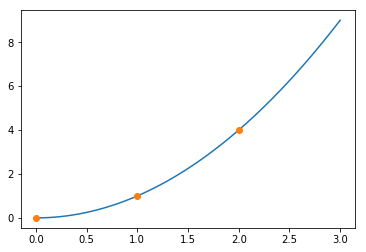

In [8]:
X = [0, 1, 2]
Y = v_f(X)
plt.plot(x,v_f(x), X, Y, "o")

En vez de evaluar el area del rectangulo justo debajo de los puntos, podemos aproximar el area del trpezoide.
$$ I = (a-b) \frac{f(a)+f(b)}{2} $$

Si tenemos muchos intervalos podemos aproxima una integral

In [9]:
def nc_1_simple(f,a,b):
    print("h=",b-a)
    return (b-a)*(f(a)+f(b))/2

In [10]:
nc_1_simple(f,0,4)

h= 4


In [11]:
def nc_1(f,a,b,intervalos):
    "Regla del trapecio"
    acumulacion = 0
    distancia_total = b-a
    h = distancia_total/intervalos
    x = a 
    print( "paso h=" +str(h))
    while x < (b):
        #print(x)
        acumulacion = acumulacion + (h)*(f(x)+f(x+h))/2
        x = x + h
    return acumulacion

In [12]:
nc_1(f,0,4,10)

paso h=0.4


Para mantener esta seccion simple solo vamos a mencionar que la reglade simpson 1/3 utiliza 3 puntos, y su polinomi que aproxima una parabola. (los polinomios son calculados a partir de una intepolacion de newton o lagrange) a continuacion una tabla:

| Segmentos | Puntos |    Nombre      |                 Formula                      |
|:---------:|:------:|:--------------:|:--------------------------------------------:|
| 1         |   2    | R. Trapezoide  | $(b-a)\frac{f(x_0)+f(x_1)}{2}$               |
| 2         |   3    | R. Simpson 1/3 | $(b-a)\frac{f(x_0)+4f(x_1)+f(x_2)}{6}$       |
| 3         |   4    | R. Simpson 3/8 | $(b-a)\frac{f_0+3f_1+3f_2+f_3}{8}$           |
| 4         |   5    | R. Boole       | $(b-a)\frac{7f_0-32f_1+12f_2-32f_3+7f_4}{3}$ |
| 5         |   6    |     ---        | $(b-a)\frac{2f(x_1)-(x_2)+f(x_2)}{3}$        |

In [13]:
def nc_2(f,a,b,intervalos):
    "Regla de Simpson 1/3"
    acumulacion = 0
    distancia_total = b-a
    h = distancia_total/(intervalos)
    x = a 
    print("Paso h=" +str(h))
    while x < (b):
        print(x)
        acumulacion = acumulacion + (h)*(f(x)+4*f(x+(h/2))+f(x+h))/6
        x = x + h
    return acumulacion

In [17]:
nc_2(f,0,4,1)

Paso h=4.0
0


Tarea: ImplementarNewton-cotes para simpson 3/8, y Regla de Bode. Porbar para la funcion impropia de la campana de gauss.

### Integración de ecuaciones


In [18]:
#@title String fields

text = 'value' #@param {type:"string"}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]
text_and_dropdown = 'value' #@param ["1st option", "2nd option", "3rd option"] {allow-input: true}

print(text)
print(dropdown)
print(text_and_dropdown)

value
1st option
value
